In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import re

import seaborn as sns

import os

In [2]:
# Путь к папке с датасетом
DATA_DIR = Path("C:/Users/vds/Work/Programming Stuff/ecup/data")

In [3]:
# Загрузка
train = pd.read_csv(DATA_DIR / "train.csv", index_col='id')
test = pd.read_csv(DATA_DIR / "test.csv", index_col='id')

# Описание датасета.

Основные категории признаков:

Идентификаторы
* id - уникальный идентификатор записи
* ItemID - идентификатор товара
* SellerID - идентификатор продавца

Описание товара

* brand_name - название бренда (пример: "Talwar Brothers")
* description - описание товара (с HTML-тегами)
* name_rus - название товара на русском
* CommercialTypeName4 - категория товара (пример: "Аксессуар для музыкального инструмента")

Рейтинги и отзывы

* rating_1_count - количество оценок 1 звезда
* rating_2_count - количество оценок 2 звезды
* rating_3_count - количество оценок 3 звезды
* rating_4_count - количество оценок 4 звезды
* rating_5_count - количество оценок 5 звезд
* comments_published_count - количество опубликованных комментариев
* photos_published_count - количество опубликованных фото
* videos_published_count - количество опубликованных видео

Финансовые показатели

* PriceDiscounted - цена со скидкой
* GmvTotal7/30/90 - общий объем продаж за 7/30/90 дней
* Статистика продаж и возвратов
* item_count_sales7/30/90 - количество продаж за период
* item_count_returns7/30/90 - количество возвратов за период
* item_count_fake_returns7/30/90 - количество фейковых возвратов (подозрительных возвратов) за период
* ExemplarAcceptedCountTotal7/30/90 - количество принятых экземпляров товара
* OrderAcceptedCountTotal7/30/90 - количество принятых заказов
* ExemplarReturnedCountTotal7/30/90 - количество возвращенных экземпляров
* ExemplarReturnedValueTotal7/30/90 - сумма возвратов

Другие метрики

* item_time_alive - "возраст" товара в днях (сколько дней существует в системе)
* seller_time_alive - "возраст" продавца в днях
* ItemVarietyCount - количество вариантов товара
* ItemAvailableCount - количество доступных единиц товара

In [4]:
train.sample(5)

,resolution,brand_name,description,name_rus,CommercialTypeName4,rating_1_count,rating_2_count,rating_3_count,rating_4_count,rating_5_count,...,ExemplarReturnedCountTotal30,ExemplarReturnedCountTotal90,ExemplarReturnedValueTotal7,ExemplarReturnedValueTotal30,ExemplarReturnedValueTotal90,ItemVarietyCount,ItemAvailableCount,seller_time_alive,ItemID,SellerID
id,,,,,,,,,,,,,,,,,,,,,
148111,0,NaN,Шестерня шнековая мясорубки Philips HR2730/34 ...,Шестерня шнековая мясорубки Philips HR2730/34 ...,Запчасти для мясорубки,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.000000,0.000000,633.034606,1.0,1.0,830.0,72709,5479
209244,0,Fanso,"ER14335, Fanso, Батарейка литиевая, 3.6В, 1650...","Fanso Батарейка, LiSOCl2 (литий-тионилхлоридны...",Типовая батарейка,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.000000,0.000000,0.000000,5.0,5.0,53.0,102525,5450
202871,0,NaN,Модифицированный фильтр для кофемашины Saeco P...,Модифицированный фильтр для кофемашины Saeco P...,Фильтр для кофемашин,NaN,NaN,NaN,NaN,NaN,...,172.0,439.0,1093.264719,1228.866070,1326.317544,11.0,11.0,1157.0,99286,4
406844,0,Sven,NaN,"Портативная колонка SVEN PS-75, 6 Вт, синий, B...",Портативная акустическая система,NaN,NaN,NaN,NaN,NaN,...,5.0,8.0,0.000000,832.300897,855.896188,2.0,2.0,892.0,198565,7549
353518,0,NaN,NaN,Игра PSP 5in1 Mega Minis Volume 3 ENG (PlaySta...,Видеоигра,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.000000,0.000000,0.000000,5.0,5.0,501.0,173855,266


In [5]:
train.iloc[127359]

resolution                                                                      1
brand_name                                                                    NaN
description                     Представляем вам наушники с микрофоном Major I...
name_rus                        Наушники с микрофоном Major IV, Bluetooth, 3.5...
CommercialTypeName4                                            Наушники Bluetooth
rating_1_count                                                                0.0
rating_2_count                                                                0.0
rating_3_count                                                                0.0
rating_4_count                                                                0.0
rating_5_count                                                                2.0
comments_published_count                                                      0.0
photos_published_count                                                        0.0
videos_published

# EDA

## Распределение классов.

resolution
0    184146
1     13052
Name: count, dtype: int64


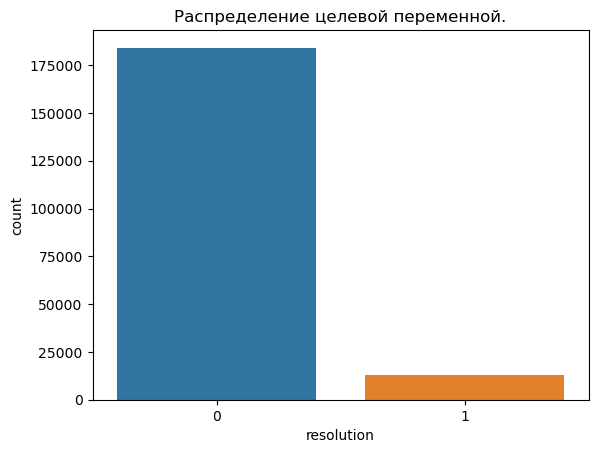

In [6]:
print(train['resolution'].value_counts())
ax = sns.countplot(data=train, x='resolution')
ax.set_title('Распределение целевой переменной.')
plt.show()

## Разделим фичи.

In [7]:
text_features_list = ['resolution', 'brand_name', 'description', 'name_rus', 'CommercialTypeName4']
num_features_list = train.select_dtypes(include=[np.number]).columns.tolist()

In [8]:
num_features = train[num_features_list]

## Работа с пропусками

In [9]:
num_features.isna().sum()

resolution                           0
rating_1_count                  150005
rating_2_count                  150005
rating_3_count                  150005
rating_4_count                  150005
rating_5_count                  150005
comments_published_count        150005
photos_published_count          150005
videos_published_count          150005
PriceDiscounted                      0
item_time_alive                      0
item_count_fake_returns7             0
item_count_fake_returns30            0
item_count_fake_returns90            0
item_count_sales7                    0
item_count_sales30                   0
item_count_sales90                   0
item_count_returns7                  0
item_count_returns30                 0
item_count_returns90                 0
GmvTotal7                        10191
GmvTotal30                        7930
GmvTotal90                        7407
ExemplarAcceptedCountTotal7      10191
ExemplarAcceptedCountTotal30      7930
ExemplarAcceptedCountTota

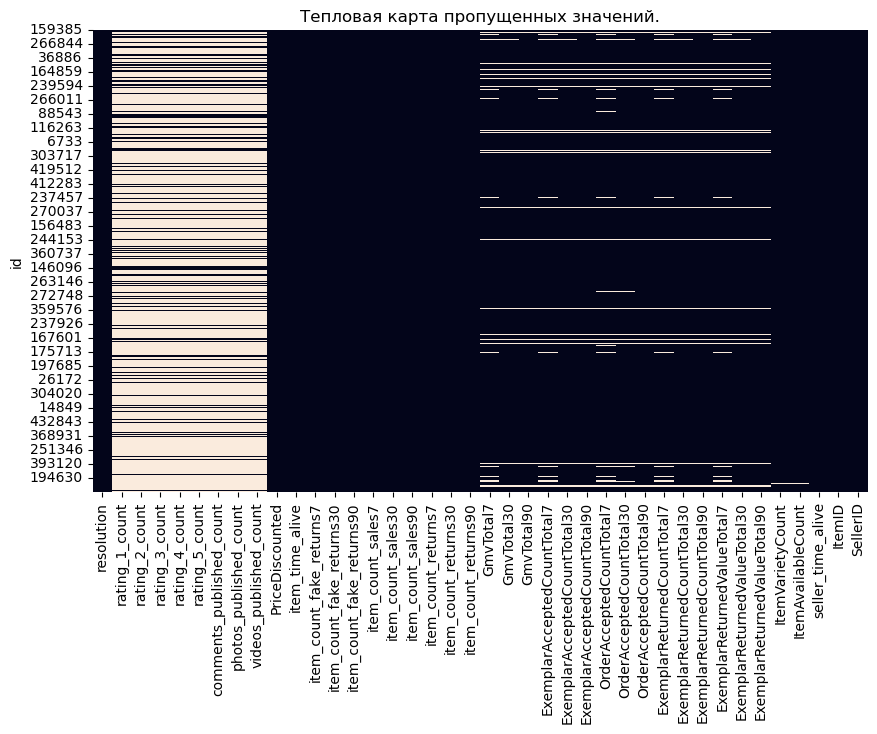

In [10]:
# Тепловая карта
plt.figure(figsize=(10, 6))
sns.heatmap(num_features.isnull(), cbar=False)
plt.title('Тепловая карта пропущенных значений.')
plt.show()

### Работа с пропусками в рейтингах.

Заметим, что есть товары у которых полностью отстувует ифнормация по рейтингу. 
Заменим переменные на 0 и добавим новую фичу is_rating_exists

In [11]:
user_interactions = ['rating_1_count', 'rating_2_count', 'rating_3_count', 'rating_4_count', 'rating_5_count',
                      'comments_published_count', 'photos_published_count', 'videos_published_count']

# Создадим новый признак - есть ли рейтинг.
num_features.loc[:, "is_rating_exists"] = np.where(num_features['rating_1_count'].isnull(), 0, 1)

# Уберем пропуски в данных рейтингов.
num_features.loc[:, user_interactions] = num_features[user_interactions].fillna(0)

C:\Users\vds\AppData\Local\Temp\ipykernel_13016\3247180889.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_features.loc[:, "is_rating_exists"] = np.where(num_features['rating_1_count'].isnull(), 0, 1)


### Работа с пропусками в total's.

#### Анализ пропусков

**Разберемся с оставшимися пропусками.**

In [12]:
# Посмотрим на total'ы

total_features = [col for col in num_features.columns if 'Total' in col]

Посмотрим на распределение totalo'в.

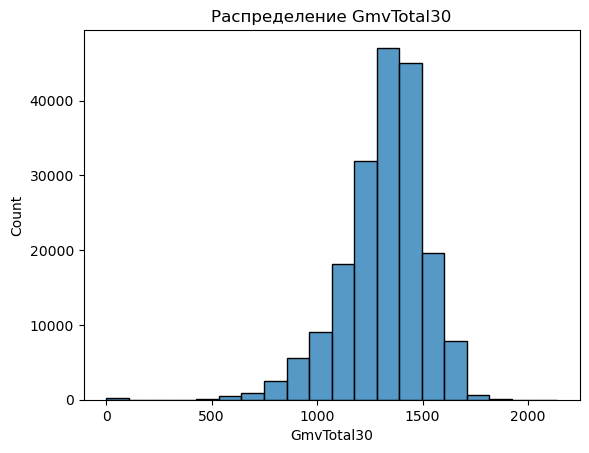

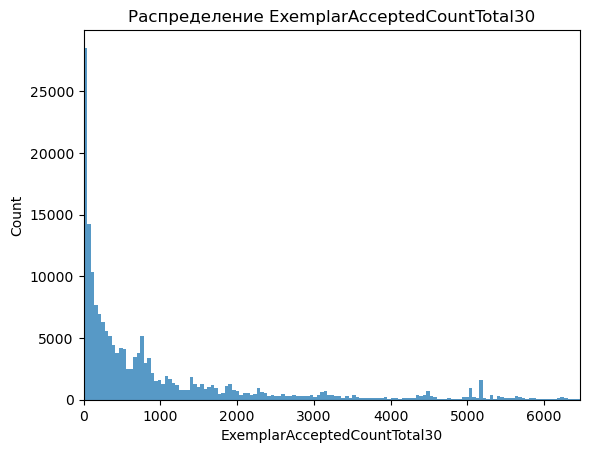

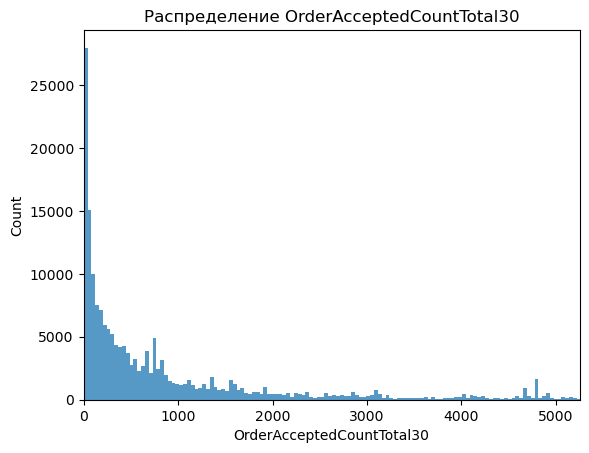

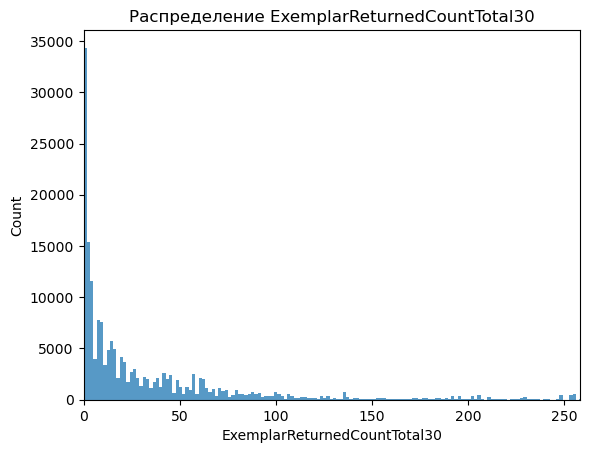

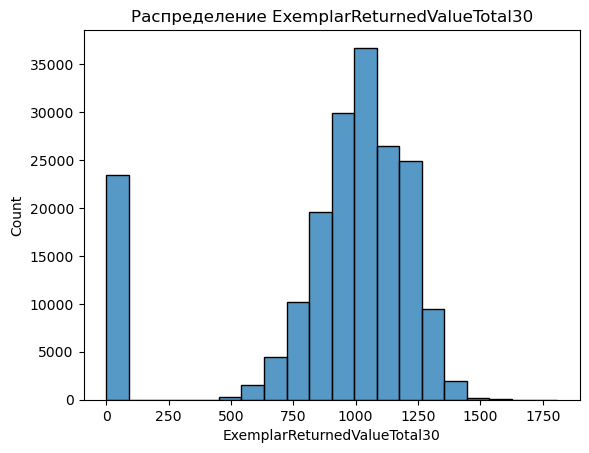

In [13]:
num = 30 # номер из [7, 30, 90], чтобы не захлямлять ноутбук
for col in [col for col in total_features if f'{num}' in col]:
    # Распределение количества продаж
    
    if 'Count' in col:
        sns.histplot(data=num_features, x=col)
        plt.xlim(0, num_features[col].quantile(0.95)) 
    else:
        sns.histplot(data=num_features, x=col, bins=20)

    plt.title(f"Распределение {col}")
    plt.show()

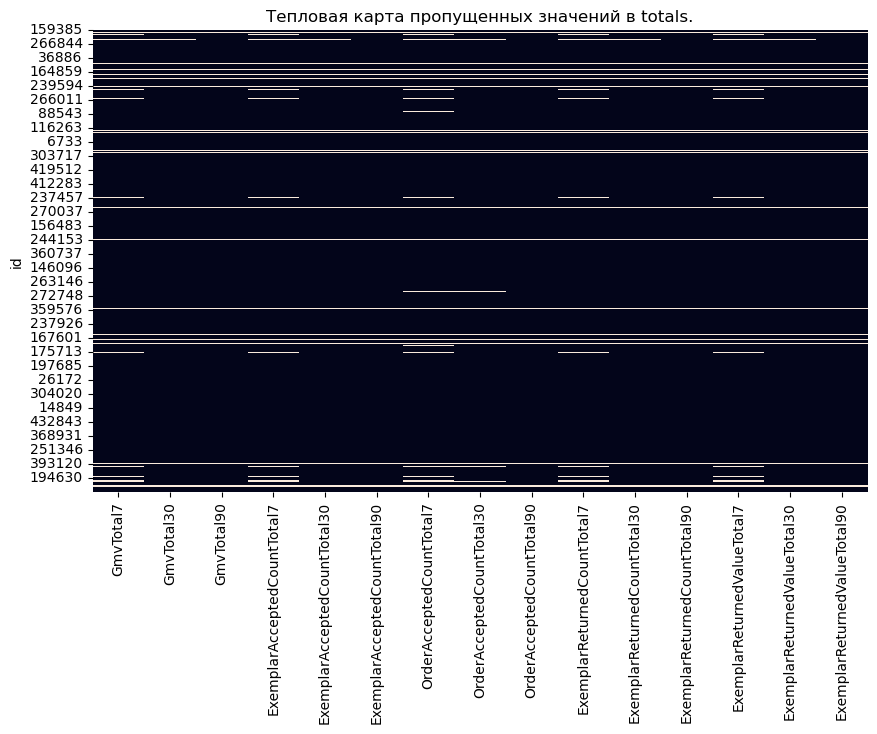

In [14]:
# Построим тепловую карту
plt.figure(figsize=(10, 6))
sns.heatmap(num_features[total_features].isnull(), cbar=False)
plt.title('Тепловая карта пропущенных значений в totals.')
plt.show()

In [15]:
num_features[[col for col in total_features if '7' in col]].isna().sum()

GmvTotal7                      10191
ExemplarAcceptedCountTotal7    10191
OrderAcceptedCountTotal7       10401
ExemplarReturnedCountTotal7    10191
ExemplarReturnedValueTotal7    10191
dtype: int64

In [16]:
num_features[[col for col in total_features if '30' in col]].isna().sum()

GmvTotal30                      7930
ExemplarAcceptedCountTotal30    7930
OrderAcceptedCountTotal30       8160
ExemplarReturnedCountTotal30    7930
ExemplarReturnedValueTotal30    7930
dtype: int64

In [17]:
num_features[[col for col in total_features if '90' in col]].isna().sum()

GmvTotal90                      7407
ExemplarAcceptedCountTotal90    7407
OrderAcceptedCountTotal90       7517
ExemplarReturnedCountTotal90    7407
ExemplarReturnedValueTotal90    7407
dtype: int64

Проверим, является ли Nan тем, что товар не был куплен.

In [18]:
# Пример: есть ли пропуски в GmvTotal, но при этом item_count_sales > 0?
mask_7 = (num_features['GmvTotal7'].isna()) & (num_features['item_count_sales7'] > 0)
mask_30 = (num_features['GmvTotal30'].isna()) & (num_features['item_count_sales30'] > 0)
mask_90 = (num_features['GmvTotal90'].isna()) & (num_features['item_count_sales90'] > 0)
print("Конфликтные строки 7 :", mask_7.sum())
print("Конфликтные строки 30 :", mask_30.sum())
print("Конфликтные строки 90 :", mask_90.sum())

Конфликтные строки 7 : 41
Конфликтные строки 30 : 2
Конфликтные строки 90 : 1


41


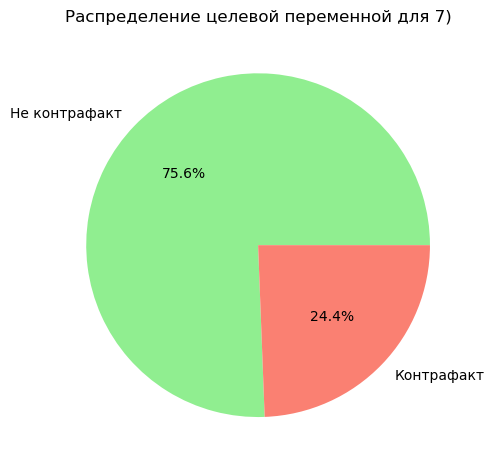

2
1


In [19]:
for num in [7, 30, 90]:
    sales_nones = num_features[(num_features[f'GmvTotal{num}'].isna()) & 
                            (num_features[f'item_count_sales{num}'] > 0) & 
                            num_features[f'OrderAcceptedCountTotal{num}'].isna()
    ]
    print(len(sales_nones))
    if len(sales_nones) < 3:
        continue
    
    sales_nones = sales_nones['resolution'].value_counts()

    plt.pie(sales_nones, 
            labels=['Не контрафакт', 'Контрафакт'], 
            autopct='%1.1f%%',
            colors=['lightgreen', 'salmon'])

    plt.title(f'Распределение целевой переменной для {num})')

    plt.tight_layout()
    plt.show()

Проверим случаи, когда GmvTotal не nan, а OrderAccepted - nan

Особых случаев за 7 дней: 210
Распределение целевой переменной в этих случаях:


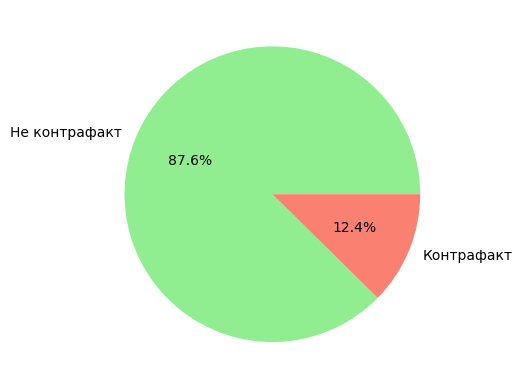

Особых случаев за 30 дней: 230
Распределение целевой переменной в этих случаях:


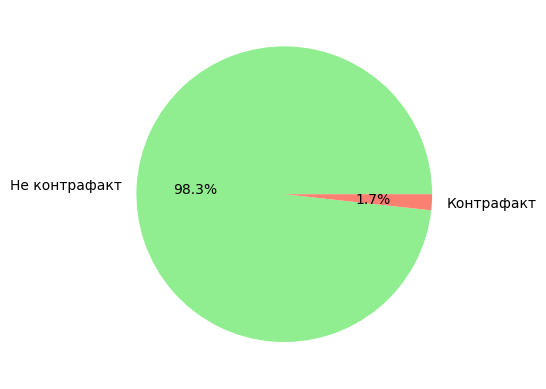

Особых случаев за 90 дней: 110
Распределение целевой переменной в этих случаях:


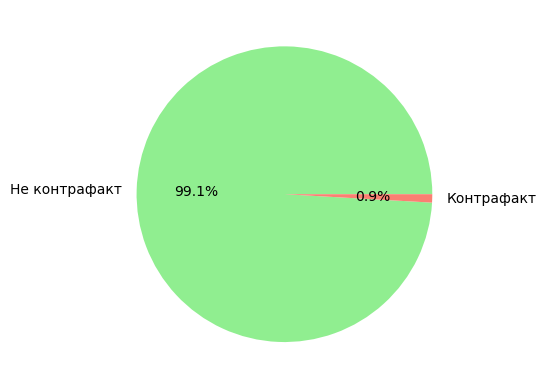

In [20]:
# Проверьте эти "особые" случаи
for num in [7, 30, 90]:
    special_cases_d = num_features[
        num_features[f'OrderAcceptedCountTotal{num}'].isna() & 
        num_features[f'GmvTotal{num}'].notna()
    ]

    print(f"Особых случаев за {num} дней: {len(special_cases_d)}")
    special_cases_d = special_cases_d['resolution'].value_counts()
    print("Распределение целевой переменной в этих случаях:")
    plt.pie(special_cases_d, 
            labels=['Не контрафакт', 'Контрафакт'], 
            autopct='%1.1f%%',
            colors=['lightgreen', 'salmon'])
    plt.show()

Посмотрим на распределение целевой переменной у nan'ов и нет

Распределение для GmvTotal7


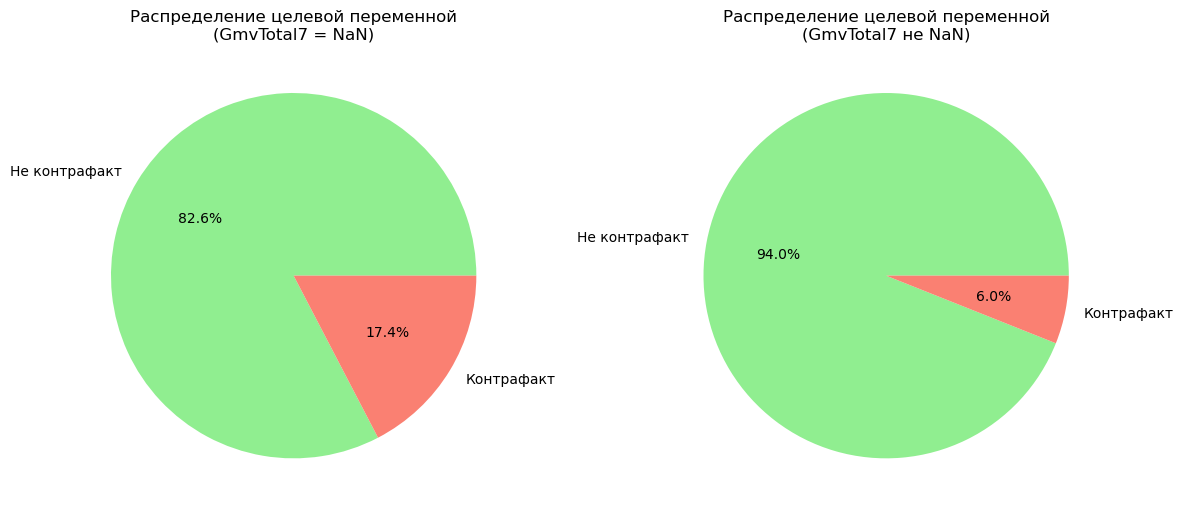

Распределение для GmvTotal30


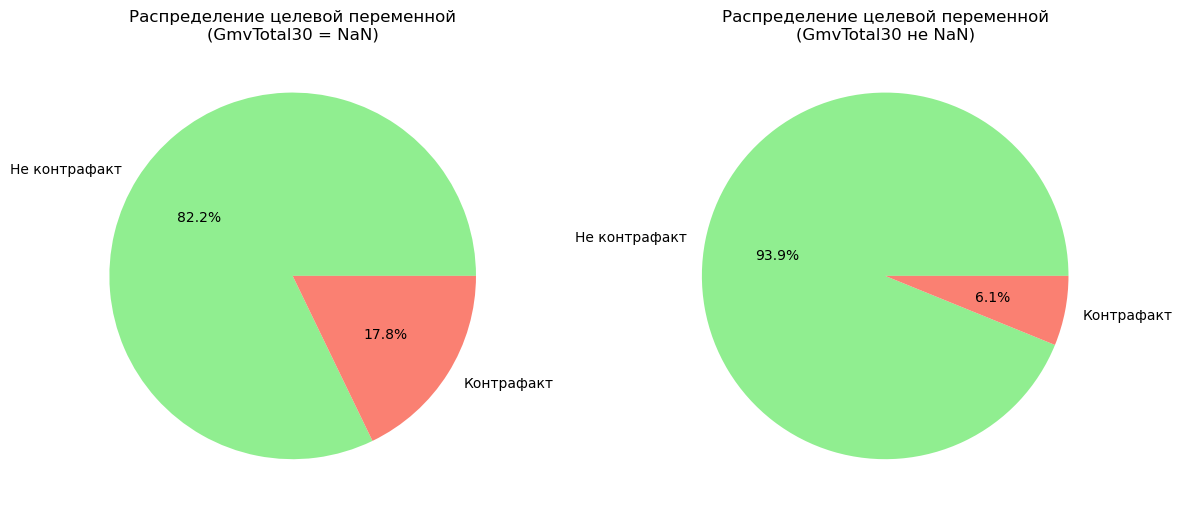

Распределение для GmvTotal90


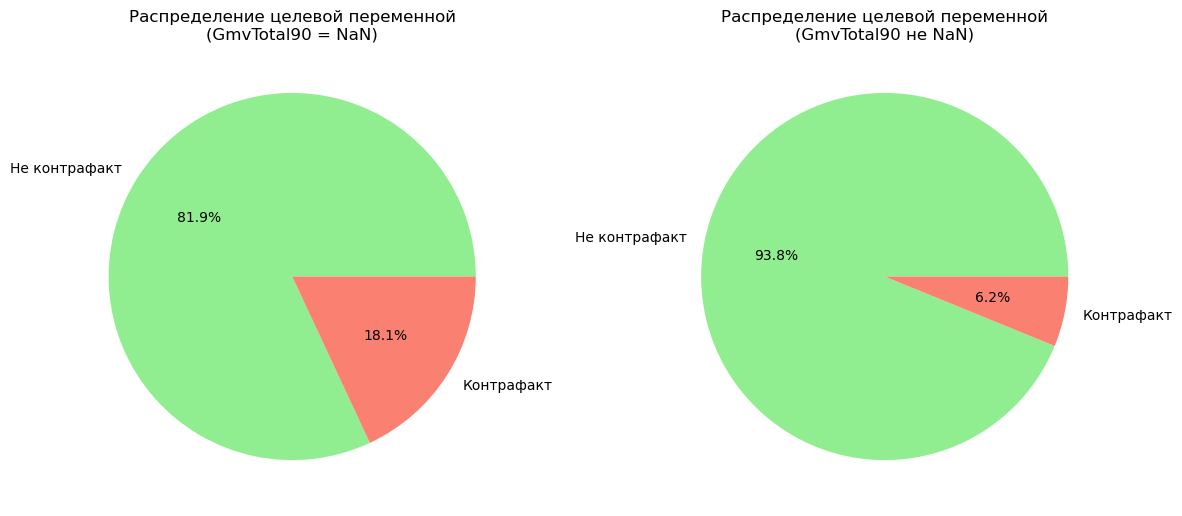

In [21]:
for feature in [name for name in total_features if 'Gmv' in name]:
        # Данные для диаграмм
        nan_group = num_features[num_features[feature].isna()]['resolution'].value_counts()
        non_nan_group = num_features[num_features[feature].notna()]['resolution'].value_counts()

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

        # Первая круговая диаграмма - для группы с NaN
        ax1.pie(nan_group, 
                labels=['Не контрафакт', 'Контрафакт'], 
                autopct='%1.1f%%',
                colors=['lightgreen', 'salmon'])
        ax1.set_title(f'Распределение целевой переменной\n({feature} = NaN)')

        # Вторая круговая диаграмма - для группы без NaN
        ax2.pie(non_nan_group, 
                labels=['Не контрафакт', 'Контрафакт'], 
                autopct='%1.1f%%',
                colors=['lightgreen', 'salmon'])
        ax2.set_title(f'Распределение целевой переменной\n({feature} не NaN)')

        print(f"Распределение для {feature}")
        plt.tight_layout()
        plt.show()

посмтрим, а есть ли товары, которые были проданы, но почему-то gmvTotal у них nan.

In [22]:
for num in [7, 30, 90]:
    print(f"For {num} days")
    print("\t", len(num_features[num_features[f'GmvTotal{num}'].isna() & num_features[f'item_count_sales{num}'] > 0]))
    print("\t", len(num_features[num_features[f'GmvTotal{num}'].isna() & num_features[f'item_count_sales{num}'] == 0]))

For 7 days
	 36
	 197162
For 30 days
	 2
	 197196
For 90 days
	 0
	 197198


Как мы видим таких всего 36 товаров за 7 дней и больше нету. В любом случае это тоже учтем.

In [23]:
num_features.sample(5)

,resolution,rating_1_count,rating_2_count,rating_3_count,rating_4_count,rating_5_count,comments_published_count,photos_published_count,videos_published_count,PriceDiscounted,...,ExemplarReturnedCountTotal90,ExemplarReturnedValueTotal7,ExemplarReturnedValueTotal30,ExemplarReturnedValueTotal90,ItemVarietyCount,ItemAvailableCount,seller_time_alive,ItemID,SellerID,is_rating_exists
id,,,,,,,,,,,,,,,,,,,,,
127349,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,666.128301,...,5.0,863.005643,915.024671,915.001697,4.0,4.0,29.0,62518,95,0
275651,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,866.477012,...,32.0,807.993316,976.399541,1109.265107,1.0,1.0,522.0,135553,1195,0
226585,0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,617.698313,...,4.0,678.475622,740.891365,786.331981,1.0,1.0,412.0,111286,1979,1
276096,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,748.716320,...,15.0,0.000000,989.211959,1047.307209,3.0,3.0,1175.0,135789,234,0
29468,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,708.889496,...,1200.0,1217.874909,1353.011097,1466.777755,33.0,33.0,1080.0,14774,69,0


#### Создание новых фич и избавление от Nan

In [24]:
for period in [7, 30, 90]:
    # Вместо одной категориальной - бинарные фичи
    num_features[f'has_full_data_{period}d'] = (num_features[f'GmvTotal{period}'].notna() & 
                                               num_features[f'OrderAcceptedCountTotal{period}'].notna()).astype(int)
    num_features[f'missing_orders_only_{period}d'] = (num_features[f'GmvTotal{period}'].notna() & 
                                                     num_features[f'OrderAcceptedCountTotal{period}'].isna()).astype(int)

C:\Users\vds\AppData\Local\Temp\ipykernel_13016\4156146048.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_features[f'has_full_data_{period}d'] = (num_features[f'GmvTotal{period}'].notna() &
C:\Users\vds\AppData\Local\Temp\ipykernel_13016\4156146048.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_features[f'missing_orders_only_{period}d'] = (num_features[f'GmvTotal{period}'].notna() &


**Теперь наконец избавляемся от nan'ов.**

In [25]:
# Список всех колонок с Total (за 7, 30, 90 дней)
total_columns = []
for period in [7, 30, 90]:
    total_columns.extend([
        f'GmvTotal{period}',
        f'ExemplarAcceptedCountTotal{period}',
        f'OrderAcceptedCountTotal{period}',
        f'ExemplarReturnedCountTotal{period}', 
        f'ExemplarReturnedValueTotal{period}'
    ])

# Заменяем все NaN на 0 в этих колонках
num_features[total_columns] = num_features[total_columns].fillna(0)

# Проверяем, что все пропуски устранены
print("Оставшиеся пропуски после заполнения:")
print(num_features[total_columns].isna().sum().sum())  # Должно быть 

Оставшиеся пропуски после заполнения:
0


### Работа с пропусками в Item

У нас было так:
ItemVarietyCount                   997
ItemAvailableCount                 997

In [26]:
# Проверим, являются ли они однимим и теми же столбцами.
len(num_features[num_features['ItemVarietyCount'].isna() & num_features['ItemAvailableCount'].isna()])

997

Посмотрим на распределение

Распределение для ItemVarietyCount


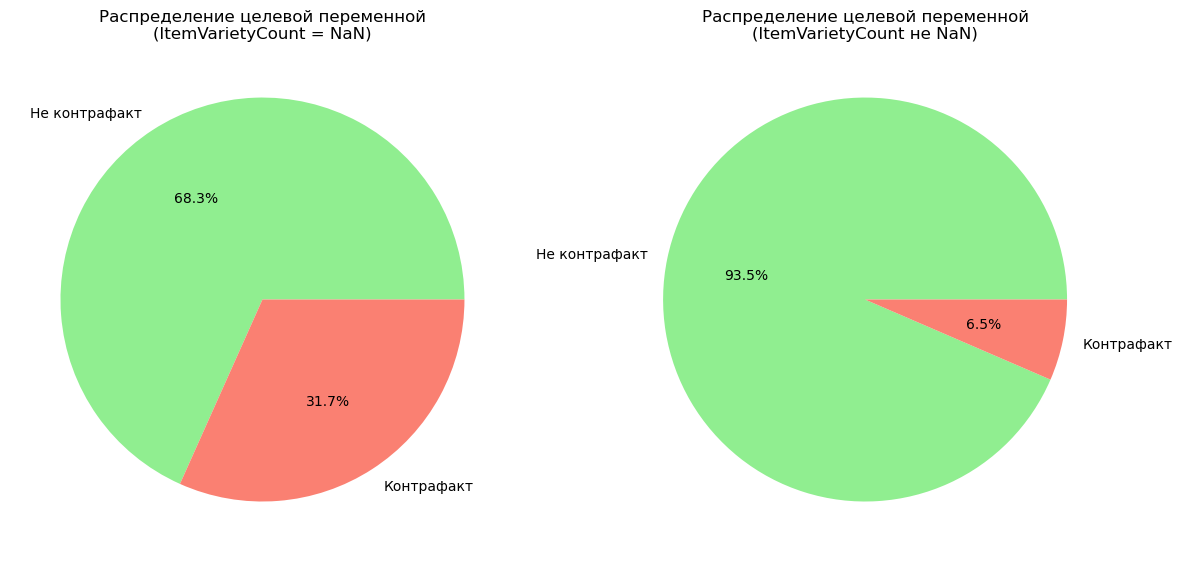

Распределение для ItemAvailableCount


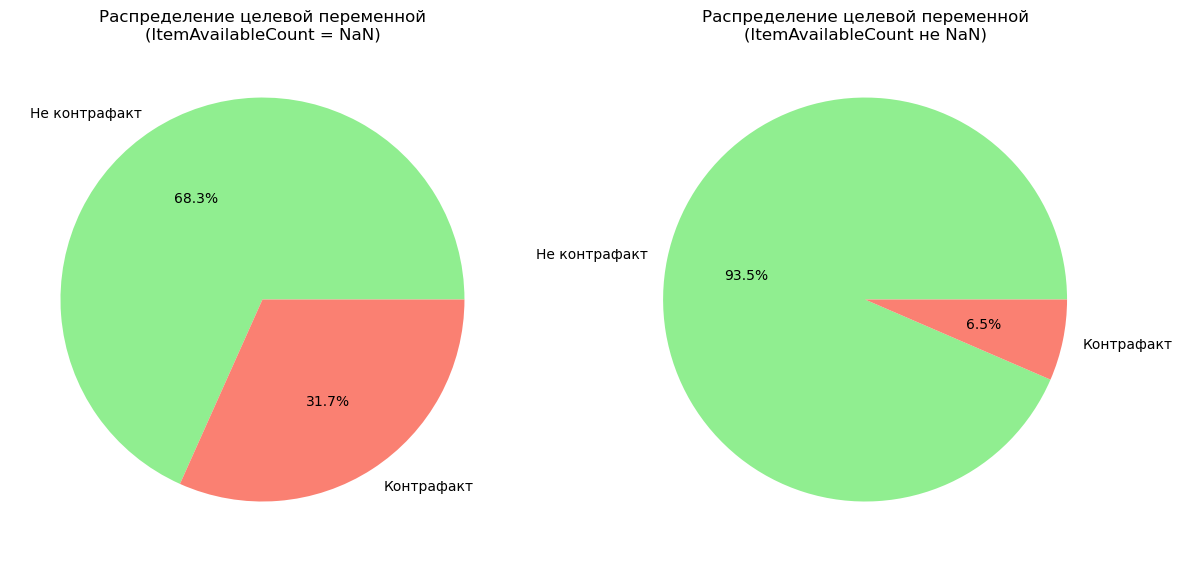

In [27]:
for feature in ['ItemVarietyCount', 'ItemAvailableCount']:
    # Данные для диаграмм
    nan_group = num_features[num_features[feature].isna()]['resolution'].value_counts()
    non_nan_group = num_features[num_features[feature].notna()]['resolution'].value_counts()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Первая круговая диаграмма - для группы с NaN
    ax1.pie(nan_group, 
            labels=['Не контрафакт', 'Контрафакт'], 
            autopct='%1.1f%%',
            colors=['lightgreen', 'salmon'])
    ax1.set_title(f'Распределение целевой переменной\n({feature} = NaN)')

    # Вторая круговая диаграмма - для группы без NaN
    ax2.pie(non_nan_group, 
            labels=['Не контрафакт', 'Контрафакт'], 
            autopct='%1.1f%%',
            colors=['lightgreen', 'salmon'])
    ax2.set_title(f'Распределение целевой переменной\n({feature} не NaN)')

    print(f"Распределение для {feature}")
    plt.tight_layout()
    plt.show()

Заменяем nan и добавляем новые столбцы.

In [28]:
num_features.loc[:, "is_item_count"] = np.where(num_features['ItemVarietyCount'].isnull(), 0, 1)

# Для fillna
num_features.loc[:, ['ItemVarietyCount', 'ItemAvailableCount']] = num_features[['ItemVarietyCount', 'ItemAvailableCount']].fillna(0)

Финальный просмотр.

In [29]:
num_features.isna().sum()

resolution                      0
rating_1_count                  0
rating_2_count                  0
rating_3_count                  0
rating_4_count                  0
rating_5_count                  0
comments_published_count        0
photos_published_count          0
videos_published_count          0
PriceDiscounted                 0
item_time_alive                 0
item_count_fake_returns7        0
item_count_fake_returns30       0
item_count_fake_returns90       0
item_count_sales7               0
item_count_sales30              0
item_count_sales90              0
item_count_returns7             0
item_count_returns30            0
item_count_returns90            0
GmvTotal7                       0
GmvTotal30                      0
GmvTotal90                      0
ExemplarAcceptedCountTotal7     0
ExemplarAcceptedCountTotal30    0
ExemplarAcceptedCountTotal90    0
OrderAcceptedCountTotal7        0
OrderAcceptedCountTotal30       0
OrderAcceptedCountTotal90       0
ExemplarReturn

## Посмотрим на корреляцию фич

In [30]:
# Считаем корреляционную матрицу
corr_matrix = num_features.corr()

# Находим пары фич с высокой корреляцией (например, >0.8 или <-0.8)
high_corr = np.where((corr_matrix > 0.8) | (corr_matrix < -0.8))

# Убираем диагональ и дубликаты
high_corr_pairs = [(corr_matrix.columns[x], corr_matrix.columns[y], round(corr_matrix.iloc[x, y], 2)) 
                   for x, y in zip(*high_corr) if x != y and x < y]

print(f"Высококоррелированные пары фич ({len(high_corr_pairs)}):")
for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]}")

Высококоррелированные пары фич (62):
rating_1_count - rating_2_count: 0.81
rating_2_count - rating_3_count: 0.93
rating_3_count - rating_4_count: 0.9
rating_4_count - rating_5_count: 0.91
rating_5_count - photos_published_count: 0.83
item_count_fake_returns7 - item_count_fake_returns30: 0.8
item_count_fake_returns7 - item_count_returns7: 0.81
item_count_fake_returns30 - item_count_returns30: 0.89
item_count_fake_returns90 - item_count_returns90: 0.86
item_count_sales7 - item_count_sales30: 0.97
item_count_sales7 - item_count_sales90: 0.87
item_count_sales30 - item_count_sales90: 0.91
item_count_returns7 - item_count_returns30: 0.82
GmvTotal7 - GmvTotal30: 0.94
GmvTotal7 - GmvTotal90: 0.9
GmvTotal7 - has_full_data_7d: 0.84
GmvTotal30 - GmvTotal90: 0.97
GmvTotal30 - has_full_data_30d: 0.82
GmvTotal90 - ExemplarReturnedValueTotal90: 0.82
GmvTotal90 - has_full_data_90d: 0.81
ExemplarAcceptedCountTotal7 - ExemplarAcceptedCountTotal30: 0.95
ExemplarAcceptedCountTotal7 - ExemplarAcceptedCount

Удаление дубликатов и perfect correlation

In [31]:
# Удаляем идеально коррелированные фичи
num_features = num_features.drop(['ItemAvailableCount'], axis=1)  # дубликат ItemVarietyCount

num_features = num_features.drop('OrderAcceptedCountTotal90', axis=1)

Оставим только один временной период.

In [32]:
# Оставляем только один период (например, 90 дней - самый полный)
periods_to_drop = ['7', '30']  # удаляем данные за 7 и 30 дней
for period in periods_to_drop:
    cols_to_drop = [col for col in num_features.columns if period in col and '90' not in col]
    num_features = num_features.drop(cols_to_drop, axis=1)

Создадим производные фичи.

In [33]:
# Вместо абсолютных значений - относительные метрики
num_features['return_rate_90d'] = num_features['item_count_returns90'] / (num_features['item_count_sales90'] + 1)
num_features['fake_return_rate_90d'] = num_features['item_count_fake_returns90'] / (num_features['item_count_sales90'] + 1)
num_features['avg_order_value_90d'] = num_features['GmvTotal90'] / (num_features['ExemplarAcceptedCountTotal90'] + 1)

In [34]:
# Корреляция всех фич с target
target_corr = num_features.corrwith(num_features['resolution']).abs().sort_values(ascending=False)

print("Топ-10 фич по корреляции с целевой переменной:")
print(target_corr.head(10))

Топ-10 фич по корреляции с целевой переменной:
resolution                      1.000000
SellerID                        0.193864
ExemplarReturnedValueTotal90    0.145031
item_time_alive                 0.143643
seller_time_alive               0.130332
GmvTotal90                      0.118792
avg_order_value_90d             0.104792
PriceDiscounted                 0.103667
has_full_data_90d               0.089530
is_item_count                   0.071903
dtype: float64


In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data.sort_values('VIF', ascending=False)

vif_results = calculate_vif(num_features.select_dtypes(include=[np.number]))
print(vif_results.head(10))

                         feature         VIF
14                    GmvTotal90  199.956872
23             has_full_data_90d  137.228265
25                 is_item_count   60.155059
17  ExemplarReturnedValueTotal90   36.794392
9                PriceDiscounted   26.189369
3                 rating_3_count   16.553955
4                 rating_4_count   12.726904
2                 rating_2_count   10.901107
5                 rating_5_count    8.971691
15  ExemplarAcceptedCountTotal90    8.718248


## Разбираемся с продавцами.

# Бейзлайн

In [36]:
num_features.sample(5)

,resolution,rating_1_count,rating_2_count,rating_3_count,rating_4_count,rating_5_count,comments_published_count,photos_published_count,videos_published_count,PriceDiscounted,...,seller_time_alive,ItemID,SellerID,is_rating_exists,has_full_data_90d,missing_orders_only_90d,is_item_count,return_rate_90d,fake_return_rate_90d,avg_order_value_90d
id,,,,,,,,,,,,,,,,,,,,,
225888,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,797.355323,...,1247.0,110973,239,0,1,0,1,0.0,0.0,0.890503
437351,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,728.674010,...,55.0,212841,4711,0,1,0,1,0.0,0.0,41.533697
392588,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,594.567256,...,8.0,192109,43,0,1,0,1,0.0,0.0,71.842042
125540,0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,621.512676,...,163.0,61621,453,1,1,0,1,0.0,0.0,0.467165
6466,0,1.0,0.0,0.0,1.0,3.0,5.0,0.0,0.0,777.914739,...,575.0,3284,98,1,1,0,1,0.0,0.0,0.727919


In [37]:
len(num_features['ItemID'].unique()) == len(num_features)

True

In [38]:
num_features.drop(columns=['ItemID', 'SellerID'], inplace=True)

In [39]:
num_features.sample(5)

,resolution,rating_1_count,rating_2_count,rating_3_count,rating_4_count,rating_5_count,comments_published_count,photos_published_count,videos_published_count,PriceDiscounted,...,ExemplarReturnedValueTotal90,ItemVarietyCount,seller_time_alive,is_rating_exists,has_full_data_90d,missing_orders_only_90d,is_item_count,return_rate_90d,fake_return_rate_90d,avg_order_value_90d
id,,,,,,,,,,,,,,,,,,,,,
438325,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,912.792163,...,914.469425,50.0,1037.0,0,0,1,1,0.000000,0.0,0.000000
326234,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,712.727183,...,1161.783727,280.0,550.0,0,1,0,1,0.000000,0.0,0.690602
335655,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,683.978379,...,968.413239,21.0,90.0,0,1,0,1,0.000000,0.0,5.100686
416512,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,711.859552,...,1405.355613,391.0,2083.0,0,1,0,1,0.000000,0.0,0.114420
78603,0,1.0,0.0,1.0,4.0,42.0,3.0,15.0,1.0,789.615358,...,1400.164696,9.0,1052.0,1,1,0,1,0.026667,0.0,0.197739


## Подготовка тестовой выборки.

In [40]:
test.isna().sum()

brand_name                       5832
description                      2224
name_rus                            0
CommercialTypeName4                 0
rating_1_count                  21053
rating_2_count                  21053
rating_3_count                  21053
rating_4_count                  21053
rating_5_count                  21053
comments_published_count        21053
photos_published_count          21053
videos_published_count          21053
PriceDiscounted                     3
item_time_alive                     0
item_count_fake_returns7            0
item_count_fake_returns30           0
item_count_fake_returns90           0
item_count_sales7                   0
item_count_sales30                  0
item_count_sales90                  0
item_count_returns7                 0
item_count_returns30                0
item_count_returns90                0
GmvTotal7                        1381
GmvTotal30                        913
GmvTotal90                        759
ExemplarAcce

In [41]:
# Отбираем нужные фичи
test_features = test[[col for col in num_features_list if col != 'resolution']]

# Удаляем ненужные столбцы
test_features.drop(columns=['ItemID', 'SellerID'], inplace=True)

C:\Users\vds\AppData\Local\Temp\ipykernel_13016\2906245559.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_features.drop(columns=['ItemID', 'SellerID'], inplace=True)


In [42]:
# --- пропуски в рейтингах

user_interactions = ['rating_1_count', 'rating_2_count', 'rating_3_count', 'rating_4_count', 'rating_5_count',
                      'comments_published_count', 'photos_published_count', 'videos_published_count']

test_features.loc[:, "is_rating_exists"] = np.where(test_features['rating_1_count'].isnull(), 0, 1)

test_features.loc[:, user_interactions] = test_features[user_interactions].fillna(0)


# --- пропуски в total
for period in [7, 30, 90]:
    # Вместо одной категориальной - три бинарные фичи
    test_features[f'has_full_data_{period}d'] = (test_features[f'GmvTotal{period}'].notna() & 
                                               test_features[f'OrderAcceptedCountTotal{period}'].notna()).astype(int)
    
    test_features[f'missing_orders_only_{period}d'] = (test_features[f'GmvTotal{period}'].notna() & 
                                                     test_features[f'OrderAcceptedCountTotal{period}'].isna()).astype(int)

# Список всех колонок с Total (за 7, 30, 90 дней)
total_columns = []
for period in [7, 30, 90]:
    total_columns.extend([
        f'GmvTotal{period}',
        f'ExemplarAcceptedCountTotal{period}',
        f'OrderAcceptedCountTotal{period}',
        f'ExemplarReturnedCountTotal{period}', 
        f'ExemplarReturnedValueTotal{period}'
    ])
# Заменяем все NaN на 0 в этих колонках
test_features[total_columns] = test_features[total_columns].fillna(0)


# --- пропуски в items
test_features.loc[:, "is_no_item_count"] = np.where(test_features['ItemVarietyCount'].isnull(), 0, 1)
test_features.loc[:, ['ItemVarietyCount', 'ItemAvailableCount']] = test_features[['ItemVarietyCount', 'ItemAvailableCount']].fillna(0)


C:\Users\vds\AppData\Local\Temp\ipykernel_13016\1060676113.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_features.loc[:, "is_rating_exists"] = np.where(test_features['rating_1_count'].isnull(), 0, 1)
C:\Users\vds\AppData\Local\Temp\ipykernel_13016\1060676113.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_features[f'has_full_data_{period}d'] = (test_features[f'GmvTotal{period}'].notna() &
C:\Users\vds\AppData\Local\Temp\ipykernel_13016\1060676113.py:17: SettingWithCopyWarning: 
A value 

In [43]:
test_features['PriceDiscounted'] = test_features['PriceDiscounted'].fillna(0)

In [44]:
# Удаляем идеально коррелированные фичи
test_features = test_features.drop(['ItemAvailableCount'], axis=1)  # дубликат ItemVarietyCount

test_features = test_features.drop('OrderAcceptedCountTotal90', axis=1)

# Оставляем только один период (например, 90 дней - самый полный)
periods_to_drop = ['7', '30']  # удаляем данные за 7 и 30 дней
for period in periods_to_drop:
    cols_to_drop = [col for col in test_features.columns if period in col and '90' not in col]
    test_features = test_features.drop(cols_to_drop, axis=1)


# Вместо абсолютных значений - относительные метрики
test_features['return_rate_90d'] = test_features['item_count_returns90'] / (test_features['item_count_sales90'] + 1)
test_features['fake_return_rate_90d'] = test_features['item_count_fake_returns90'] / (test_features['item_count_sales90'] + 1)
test_features['avg_order_value_90d'] = test_features['GmvTotal90'] / (test_features['ExemplarAcceptedCountTotal90'] + 1)

In [45]:
# Проверяем, что все пропуски устранены
print("Оставшиеся пропуски после заполнения:")
print(test_features.isna().sum().sum())  # Должно быть 

Оставшиеся пропуски после заполнения:
0


## Разделение на train/test

In [46]:
X_test = test_features.to_numpy()

In [47]:
from sklearn.model_selection import train_test_split

def split_train_test_basic(df, target_column='resolution', test_size=0.3, random_state=15):
    """
    разделение на train и test
    
    Parameters:
    df - исходный DataFrame
    target_column - название целевой переменной
    test_size - доля test выборки (0.2 = 20%)
    random_state - для воспроизводимости результатов
    """
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=test_size, 
        random_state=random_state,
        stratify=y  # стратификация по целевой переменной
    )
    
    return X_train, X_test, y_train, y_test

In [48]:
X_train, X_val, y_train, y_val = split_train_test_basic(num_features)

In [49]:
print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape = {X_test.shape}')

X_train.shape = (138038, 26)
X_test.shape = (22760, 26)


## Обучение базовой модели.

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score

model = RandomForestClassifier(n_estimators=80, random_state=3)
model.fit(X_train, y_train)

val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_pred)

# Добавляем вычисление F1-score
val_f1 = f1_score(y_val, val_pred, average='weighted')  # weighted для несбалансированных данных

print(f"Validation accuracy: {val_accuracy:.4f}")
print(f"Validation F1-score: {val_f1:.4f}")
print("Classification report:")
print(classification_report(y_val, val_pred))
print()

Validation accuracy: 0.9638
Validation F1-score: 0.9594
Classification report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     55244
           1       0.88      0.52      0.66      3916

    accuracy                           0.96     59160
   macro avg       0.92      0.76      0.82     59160
weighted avg       0.96      0.96      0.96     59160




F1 Test == 0.5

## Вторая бейзлайн модель.

In [54]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score

# Инициализация и обучение модели
model = CatBoostClassifier(
    iterations=1500,           # Количество итераций (деревьев)
    learning_rate=0.1,         # Скорость обучения
    depth=11,                   # Глубина деревьев
    random_state=15,           # Для воспроизводимости
    verbose=100,               # Вывод лога каждые 100 итераций
    eval_metric='F1',          # Метрика для отслеживания
    early_stopping_rounds=50,  # Ранняя остановка
    cat_features=list(X_train.select_dtypes(include=['object', 'category']).columns)  # Автоматическое определение категориальных признаков
)

# Обучение модели с валидационным набором
model.fit(
    X_train, y_train,
    eval_set=(X_val, y_val),
    use_best_model=True,      # Использовать лучшую модель по валидации
    plot=True                 # Построить график обучения
)

# Предсказание на валидационной выборке
val_pred = model.predict(X_val)
val_pred_proba = model.predict_proba(X_val)  # Вероятности для ROC-AUC

# Вычисление метрик
val_accuracy = accuracy_score(y_val, val_pred)
val_f1 = f1_score(y_val, val_pred, average='weighted')

print(f"Validation accuracy: {val_accuracy:.4f}")
print(f"Validation F1-score: {val_f1:.4f}")
print("Classification report:")
print(classification_report(y_val, val_pred))
print()

# Дополнительная информация о модели
print("Количество деревьев в лучшей модели:", model.tree_count_)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.0733558	test: 0.0760177	best: 0.0760177 (0)	total: 167ms	remaining: 4m 10s
100:	learn: 0.5345174	test: 0.4804551	best: 0.4808362 (99)	total: 15.9s	remaining: 3m 39s
200:	learn: 0.6684951	test: 0.5565844	best: 0.5565844 (200)	total: 31.6s	remaining: 3m 24s
300:	learn: 0.7381176	test: 0.5937863	best: 0.5937863 (300)	total: 47.3s	remaining: 3m 8s
400:	learn: 0.7882497	test: 0.6175325	best: 0.6175325 (400)	total: 1m 2s	remaining: 2m 52s
500:	learn: 0.8269472	test: 0.6349511	best: 0.6356068 (497)	total: 1m 18s	remaining: 2m 35s
600:	learn: 0.8545900	test: 0.6435942	best: 0.6440248 (599)	total: 1m 33s	remaining: 2m 19s
700:	learn: 0.8781075	test: 0.6511262	best: 0.6515438 (693)	total: 1m 49s	remaining: 2m 4s
800:	learn: 0.8988990	test: 0.6599937	best: 0.6604069 (799)	total: 2m 5s	remaining: 1m 49s
900:	learn: 0.9120834	test: 0.6643804	best: 0.6643804 (899)	total: 2m 20s	remaining: 1m 33s
1000:	learn: 0.9220040	test: 0.6694587	best: 0.6698728 (992)	total: 2m 36s	remaining: 1m 17s


## Делаем сабмит

In [55]:
test_predictions = model.predict(X_test)

submission = pd.DataFrame({
    'id': test_features.index,
    'prediction': test_predictions
})

submission.to_csv('submission.csv', index=False)


print(f"Создан файл submission.csv с {len(submission)} предсказаниями")
print(f"Распределение предсказаний:")
print(submission['prediction'].value_counts())
print()

Создан файл submission.csv с 22760 предсказаниями
Распределение предсказаний:
prediction
0    22210
1      550
Name: count, dtype: int64



In [56]:
test.loc[test['ItemID']==185541]

,brand_name,description,name_rus,CommercialTypeName4,rating_1_count,rating_2_count,rating_3_count,rating_4_count,rating_5_count,comments_published_count,...,ExemplarReturnedCountTotal30,ExemplarReturnedCountTotal90,ExemplarReturnedValueTotal7,ExemplarReturnedValueTotal30,ExemplarReturnedValueTotal90,ItemVarietyCount,ItemAvailableCount,seller_time_alive,ItemID,SellerID
id,,,,,,,,,,,,,,,,,,,,,
378211,Sony,Обложки от Нашего магазина – это первые в Росс...,"Игра ""GTA 6"" PS5 - Кастомная обложка для диска","Игровая атрибутика, фигурки персонажей",NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,5.0,0.0,740.621354,791.102458,2.0,2.0,297.0,185541,4978


# Кластерный подход - бейзлайн.

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, HDBSCAN, OPTICS


# Стандартизируем
scaler = StandardScaler()
X_cluster = scaler.fit_transform(X_train)

In [53]:
clusterer = HDBSCAN(
    min_cluster_size=50,
    min_samples=10,
    cluster_selection_epsilon=0.5
)

clusters = clusterer.fit_predict(X_cluster)

In [57]:
num_features_cluster = X_train.copy()
num_features_cluster['cluster'] = clusters

In [66]:
num_features_cluster['resolution'] = num_features['resolution']

In [76]:
# Анализируем каждый кластер
cluster_stats = num_features_cluster.groupby('cluster').agg({
    'cluster': 'count',  # размер кластера
    'resolution': 'mean',  # процент контрафакта
    'PriceDiscounted': ['mean', 'std'],
    'fake_return_rate_90d': 'mean'
})

print("Статистика по кластерам:")
print(f"Всего кластеров: {len(num_features_cluster['cluster'].unique())}")
print(cluster_stats.sort_values(('resolution', 'mean'),ascending=False)) 

Статистика по кластерам:
Всего кластеров: 87
        cluster resolution PriceDiscounted             fake_return_rate_90d
          count       mean            mean         std                 mean
cluster                                                                    
5            80   1.000000      301.068005    0.009485                  0.0
48           86   1.000000      281.233043   13.497190                  0.0
19          269   1.000000      301.068917    0.009962                  0.0
68           94   0.734043      835.909664    6.888754                  0.0
30          155   0.522581      285.993995   55.908153                  0.0
...         ...        ...             ...         ...                  ...
54           54   0.000000      636.476654   46.536171                  0.0
55           50   0.000000      698.936519   71.681073                  0.0
22           76   0.000000      634.361748   20.247025                  0.0
57          461   0.000000      753.579774 

In [77]:
from sklearn.model_selection import train_test_split

def split_train_test_basic(df, target_column='resolution', test_size=0.2, random_state=15):
    """
    разделение на train и test
    
    Parameters:
    df - исходный DataFrame
    target_column - название целевой переменной
    test_size - доля test выборки (0.2 = 20%)
    random_state - для воспроизводимости результатов
    """
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=test_size, 
        random_state=random_state,
        stratify=y  # стратификация по целевой переменной
    )
    
    return X_train, X_test, y_train, y_test

X_train, X_val, y_train, y_val = split_train_test_basic(num_features_cluster)

In [78]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score

# Инициализация и обучение модели
model = CatBoostClassifier(
    iterations=1000,           # Количество итераций (деревьев)
    learning_rate=0.1,         # Скорость обучения
    depth=9,                   # Глубина деревьев
    random_state=15,           # Для воспроизводимости
    verbose=100,               # Вывод лога каждые 100 итераций
    eval_metric='F1',          # Метрика для отслеживания
    early_stopping_rounds=50,  # Ранняя остановка
    cat_features=['cluster']  # Автоматическое определение категориальных признаков
)

# Обучение модели с валидационным набором
model.fit(
    X_train, y_train,
    eval_set=(X_val, y_val),
    use_best_model=True,      # Использовать лучшую модель по валидации
    plot=True                 # Построить график обучения
)

# Предсказание на валидационной выборке
val_pred = model.predict(X_val)
val_pred_proba = model.predict_proba(X_val)  # Вероятности для ROC-AUC

# Вычисление метрик
val_accuracy = accuracy_score(y_val, val_pred)
val_f1 = f1_score(y_val, val_pred, average='weighted')

print(f"Validation accuracy: {val_accuracy:.4f}")
print(f"Validation F1-score: {val_f1:.4f}")
print("Classification report:")
print(classification_report(y_val, val_pred))
print()

# Дополнительная информация о модели
print("Количество деревьев в лучшей модели:", model.tree_count_)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.0278447	test: 0.0279270	best: 0.0279270 (0)	total: 252ms	remaining: 4m 12s
100:	learn: 0.4489796	test: 0.4078399	best: 0.4080100 (99)	total: 10.4s	remaining: 1m 32s
200:	learn: 0.5714555	test: 0.4883359	best: 0.4891135 (199)	total: 21.1s	remaining: 1m 23s
300:	learn: 0.6564166	test: 0.5308411	best: 0.5308411 (300)	total: 31.5s	remaining: 1m 13s
400:	learn: 0.7098260	test: 0.5630647	best: 0.5630647 (400)	total: 41.6s	remaining: 1m 2s
500:	learn: 0.7460225	test: 0.5812878	best: 0.5838068 (496)	total: 51.8s	remaining: 51.6s
600:	learn: 0.7789337	test: 0.5911017	best: 0.5928017 (597)	total: 1m 2s	remaining: 41.2s
700:	learn: 0.8074811	test: 0.5997191	best: 0.5997191 (698)	total: 1m 12s	remaining: 30.8s
800:	learn: 0.8271972	test: 0.6084233	best: 0.6093315 (782)	total: 1m 22s	remaining: 20.5s
900:	learn: 0.8432466	test: 0.6157567	best: 0.6159696 (899)	total: 1m 32s	remaining: 10.2s
999:	learn: 0.8582792	test: 0.6167644	best: 0.6176066 (989)	total: 1m 42s	remaining: 0us

bestTest

In [79]:
test_predictions = model.predict(X_test)

submission = pd.DataFrame({
    'id': test_features.index,
    'prediction': test_predictions
})

submission.to_csv('submission.csv', index=False)


print(f"Создан файл submission.csv с {len(submission)} предсказаниями")
print(f"Распределение предсказаний:")
print(submission['prediction'].value_counts())
print()

CatBoostError: 'data' is numpy array of floating point numerical type, it means no categorical features, but 'cat_features' parameter specifies nonzero number of categorical features

#